In [357]:
import warnings

# Filter out specific objc warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="objc")

import cellpose
from skimage import io
import numpy as np


In [358]:
from cellpose import io, utils, metrics, core, models
from skimage import measure
import math
import matplotlib.pyplot as plt

In [359]:
import tensorflow
import imageio
import pandas as pd

In [1834]:
image_file_path = "Human JAK2+ patient samples/JAK2-GZ01_8_R2&R1/320_Ch5.ome.tif"

In [1835]:
# Load an example image
image_path = f"/Users/fm07-admin/Gary and Nik Dropbox/@Work at Frankfurt/Raw images/{image_file_path}"
image = io.imread(image_path)

# Create a Cellpose model for cell segmentation
model = cellpose.models.Cellpose(gpu=True, model_type='nuclei') # You can also use cpu=False if you have a GPU

# Segment the image
masks, flows, styles, diams = model.eval(image, diameter=25, channels=[0, 0])



<tifffile.TiffTag 266 @82> raised ValueError('0 is not a valid FILLORDER')


In [1836]:
np.unique(masks, return_counts=True)

(array([0, 1], dtype=uint16), array([3320,  180]))

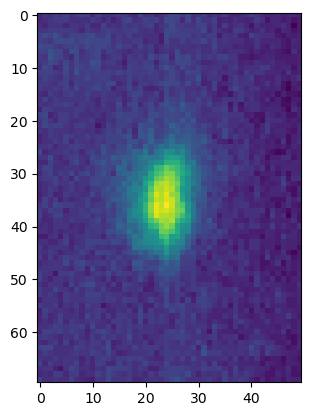

In [1837]:
plt.imshow(image)

In [1838]:
#selected_image = image*(masks==1)
#plt.imshow(selected_image)

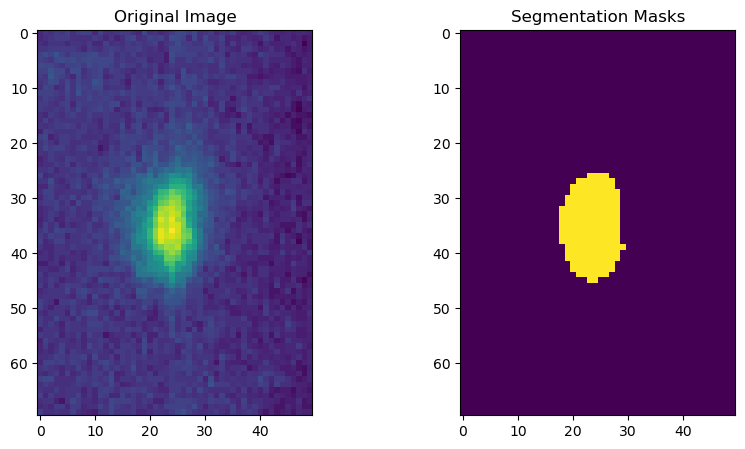

In [1839]:
# Visualize the segmentation results
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(masks)
ax[1].set_title('Segmentation Masks')
plt.show()

In [1840]:
image.shape

(70, 50)

In [1841]:
np.expand_dims(image, axis=-1).reshape(image.shape[0], image.shape[1]).shape

(70, 50)

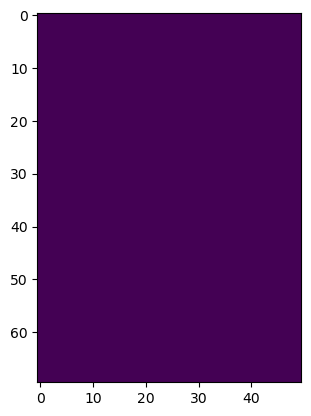

In [1842]:
plt.imshow(np.zeros((image.shape[0], image.shape[1])))

In [1843]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
from skimage import data, filters, measure, morphology

#img = data.coins()
# Binary image, post-process the binary mask and compute labels
#threshold = filters.threshold_otsu(masks)
#mask = masks > threshold
#mask = morphology.remove_small_objects(mask, 50)
#mask = morphology.remove_small_holes(mask, 50)
#labels = measure.label(mask)

fig = px.imshow(image, binary_string=True)
fig.update_traces(hoverinfo='skip')  # hover is only for label info

props = measure.regionprops(masks, image)
properties = ['area', 'eccentricity', 'perimeter', 'intensity_mean']
'''
# For each label, add a filled scatter trace for its contour,
# and display the properties of the label in the hover of this trace.
for index in range(1, labels.max()):
    label_i = props[index].label
    contour = measure.find_contours(labels == label_i, 0.5)[0]
    y, x = contour.T
    hoverinfo = ''
    for prop_name in properties:
        hoverinfo += f'<b>{prop_name}: {getattr(props[index], prop_name):.2f}</b><br>'
    fig.add_trace(
        go.Scatter(
            x=x,
            y=y,
            name=label_i,
            mode='lines',
            fill='toself',
            showlegend=False,
            hovertemplate=hoverinfo,
            hoveron='points+fills',
        )
    )

plotly.io.show(fig)
'''

"\n# For each label, add a filled scatter trace for its contour,\n# and display the properties of the label in the hover of this trace.\nfor index in range(1, labels.max()):\n    label_i = props[index].label\n    contour = measure.find_contours(labels == label_i, 0.5)[0]\n    y, x = contour.T\n    hoverinfo = ''\n    for prop_name in properties:\n        hoverinfo += f'<b>{prop_name}: {getattr(props[index], prop_name):.2f}</b><br>'\n    fig.add_trace(\n        go.Scatter(\n            x=x,\n            y=y,\n            name=label_i,\n            mode='lines',\n            fill='toself',\n            showlegend=False,\n            hovertemplate=hoverinfo,\n            hoveron='points+fills',\n        )\n    )\n\nplotly.io.show(fig)\n"

In [1844]:
props = measure.regionprops_table(
    masks,
    properties=('centroid', 'orientation', 'axis_major_length', 'axis_minor_length', 'area'),
)

In [1845]:
props_table = pd.DataFrame(props)
props_table

,centroid-0,centroid-1,orientation,axis_major_length,axis_minor_length,area
0,35.311111,23.383333,-0.020205,20.14578,11.443728,180.0


In [1846]:
list(props_table.index)

[0]

In [1847]:
props['axis_major_length']/props['axis_minor_length']

array([1.76042109])

In [1848]:
axis_ratio = props_table['axis_major_length']/props_table['axis_minor_length']
props_table["axis_ratio"] = axis_ratio

In [1849]:
props_table

,centroid-0,centroid-1,orientation,axis_major_length,axis_minor_length,area,axis_ratio
0,35.311111,23.383333,-0.020205,20.14578,11.443728,180.0,1.760421


In [1850]:
props_table_modified = props_table[(props_table["axis_ratio"]<1.95)& (props_table["area"]>80)]
props_table_modified

,centroid-0,centroid-1,orientation,axis_major_length,axis_minor_length,area,axis_ratio
0,35.311111,23.383333,-0.020205,20.14578,11.443728,180.0,1.760421


In [1851]:
selected_mask = list(props_table_modified[props_table_modified["area"] == max(props_table_modified["area"])].index)[0]+1
selected_mask

1

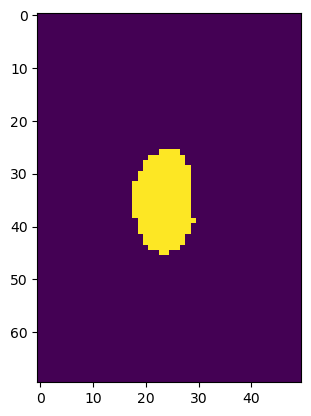

In [1852]:
plt.imshow(masks == selected_mask)

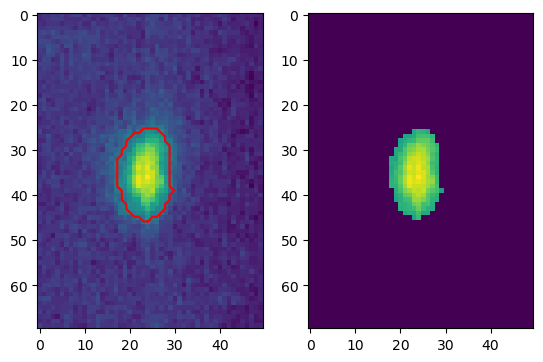

In [1853]:
img = image
contours = measure.find_contours(masks == selected_mask, level= 0.2)
f,ax = plt.subplots(ncols = 2)
ax[0].imshow(img)
for contour in contours:
    ax[0].plot(contour[:,1],contour[:,0],'r')
selected_image = image*(masks == selected_mask)
ax[1].imshow(selected_image)
plt.show()

In [1855]:
### Uncheck when saving random file
user_input = input(f"Do you want to continue saving {image_file_path}? (yes/no): ")
if user_input.lower() == "yes":
    print("Continuing...")
    #imageio.imwrite(f"/Users/fm07-admin/Gary and Nik Dropbox/@Work at Frankfurt/Segmented_images_CellPose_Cyto3_15/Tiff_images/{image_file_path}", selected_image.astype("uint16"), format = "TIFF")
    img = image
    contours = measure.find_contours(masks == selected_mask, level= 0.2)
    f,ax = plt.subplots(ncols = 2)
    ax[0].imshow(img)
    for contour in contours:
        ax[0].plot(contour[:,1],contour[:,0],'r')
    selected_image = image*(masks == selected_mask)
    ax[1].imshow(selected_image)
    imageio.imwrite(f"/Users/fm07-admin/Gary and Nik Dropbox/@Work at Frankfurt/Segmented_images_CellPose_Cyto3_15/Tiff_images/{image_file_path}", selected_image.astype("uint16"), format = "TIFF")
    f.savefig(os.path.join(f"/Users/fm07-admin/Gary and Nik Dropbox/@Work at Frankfurt/Segmented_images_CellPose_Cyto3_15/Png_images/{image_file_path.replace('.tif', '.png')}"))
    plt.close()
else:
    print("Exiting...")

Do you want to continue saving Human JAK2+ patient samples/JAK2-GZ01_8_R2&R1/320_Ch5.ome.tif? (yes/no): yes
Continuing...


In [1417]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
#from pyclesperanto_prototype import imshow
#import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import skimage.io as skio
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage import io, morphology

from skimage.morphology import binary_dilation
from skimage.filters import gaussian
from skimage import measure
from Segmenting_Image_Resources import *
import os
import imageio
import tifffile
from skimage.morphology import convex_hull_image
import cv2

In [1659]:
def remove_unwanted_region(label_image_data):
    import numpy as np
    import scipy.ndimage as ndimage

    # Load the 3D label image
    
    label_image = label_image_data.copy()

    # Identify connected components in the label image
    labeled_components, num_components = ndimage.label(label_image.copy())

    # Find the size of each connected component
    component_sizes = ndimage.sum(label_image, labeled_components, range(1, num_components + 1))

    # Determine the label value of the undesired region to be removed
    undesired_label = 1

    # Find the index of the largest connected component with the undesired label
    largest_component_idx = np.argmax(component_sizes)

    # Create a mask to select the undesired region
    undesired_mask = (labeled_components == largest_component_idx + 1) & (label_image == undesired_label)

    # Remove the undesired region from the label image
    label_image[undesired_mask] = 0

    # Remove the undesired smaller region from the image and keep the larger image

    # Create a copy of the image
    image_modified = np.copy(label_image_data)

    # Set the pixels in image_modified to 0 where the mask has a label of 1
    image_modified[label_image == 1] = 0
    
    return image_modified


def set_thresholds(count_reading_mask_array):
    import numpy as np

    # Example numpy array
    arr = count_reading_mask_array

    # Find indices of zeros
    zero_indices = np.where(arr == 0)[0]
    zero_indices = consecutive(zero_indices)
    zero_indices = [i for i in zero_indices if len(i)>1]
    if len(zero_indices)!=0:
        zero_indices = np.concatenate(zero_indices)
        #print(zero_indices)

        # Set lower_threshold to the last value before the first zero
        if len(zero_indices) > 0:
            first_zero_index = zero_indices[0]
            lower_threshold = arr[first_zero_index - 1]
        else:
            lower_threshold = arr[-1]

        # If there are no zeros left, set upper_threshold to the next value after the last non-zero element
        if len(zero_indices) == 0:
            upper_threshold = arr[arr.nonzero()[0][-1] + 1]
        else:
            # Set upper_threshold to the first non-zero value after all zeros
            upper_threshold = arr[zero_indices[-1] + 1]

        print("Lower Threshold:", lower_threshold)
        print("Upper Threshold:", upper_threshold)
    else:
        lower_threshold = None
        upper_threshold = None
        print("Lower Threshold:", lower_threshold)
        print("Upper Threshold:", upper_threshold)


    return lower_threshold, upper_threshold


def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

def define_paths(path_for_raw_images, Experiments_Types):
    # Initialize list to store image paths
    image_paths = []

    # Iterate over each experiment type
    for experiment_type in Experiments_Types:
        # Construct the full path for the experiment folder
        experiment_path = os.path.join(path_for_raw_images, experiment_type)
        
        # Check if the experiment folder exists
        if os.path.isdir(experiment_path):
            # Recursively traverse the directory structure
            for root, dirs, files in os.walk(experiment_path):
                # Iterate over subdirectories
                for dir_name in dirs:
                    # Construct the full path for the current subdirectory
                    dir_path = os.path.join(root, dir_name)
                    # Append the path to the list of image paths
                    image_paths.append(dir_path)

    # Now, image_paths list contains the paths of all image folders within each experiment folder

    remove_paths = []                
    for each_path in image_paths:
        if ".tif" not in os.listdir(each_path)[0]:
            remove_paths.append(each_path)
    for each_path in remove_paths:    
        image_paths.remove(each_path)

    image_paths_extensions = [i.replace(path_for_raw_images, "") for i in image_paths]

    return image_paths_extensions

In [1665]:
imstack1 = image

count_hist, reading_hist = np.histogram(imstack1, bins=40)

count_reading_mask_array = reading_hist * [np.array([0] + list(count_hist))<count_hist.mean()][0]

lower_threshold, upper_threshold = set_thresholds(count_reading_mask_array)

if not upper_threshold:
    output_variable = "False"
    print(output_variable)
    #return output_variable
threshold = upper_threshold
mask_image = np.zeros(imstack1.shape)
mask_image[imstack1>threshold] = 1

threshold = lower_threshold
mask_image2 = np.zeros(imstack1.shape)
mask_image2[imstack1<threshold] = 1

masked_image = np.zeros(imstack1.shape)
masked_image[np.ma.mask_or(mask_image, mask_image2)] = 1

masked_image_new = gaussian(masked_image, sigma=0.15)

masked_image_new_modified = masked_image_new>0

masked_image_modified = remove_unwanted_region(masked_image_new_modified)

unique, count = np.unique(masked_image, return_index=True)

min_distance = 9

count_labels = [0]

while len(count_labels)==1:
    # Now we want to separate the two objects in image
    # Generate the markers as local maxima of the distance to the background
    distance = ndi.distance_transform_edt((masked_image_modified).astype("int64"))
    coords = peak_local_max(distance, footprint=np.ones((1, 1)), labels=(masked_image_modified).astype("int64"), min_distance=min_distance)
    mask = np.zeros(distance.shape, dtype=bool)
    mask[tuple(coords.T)] = True
    markers, _ = ndi.label(mask)
    labels = watershed(-distance, markers, mask=(masked_image_modified).astype("int64"), watershed_line=False)

    type_labels, count_labels = np.unique(labels, return_counts=True)

    min_distance = min_distance-1

count_list = []
label_list = []
for each_count, each_label in zip(count_labels, type_labels):
    if each_label>0:
        count_list.append(each_count)
        label_list.append(each_label)
label_to_consider = label_list[np.where(count_list == max(count_list))[0][0]]

labelled_image = labels==label_to_consider

final_mask = masked_image_modified * labelled_image * masked_image_new

new_mask = gaussian(final_mask, sigma=0.8)

#contours = measure.find_contours(new_mask, level= 0.2) # level is half of 255 (ish). What happens if we change it?

#selected_image = imstack1*new_mask

Lower Threshold: 23.5
Upper Threshold: 34.0


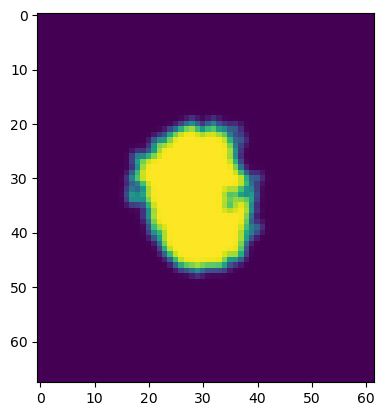

In [1666]:
plt.imshow(new_mask)

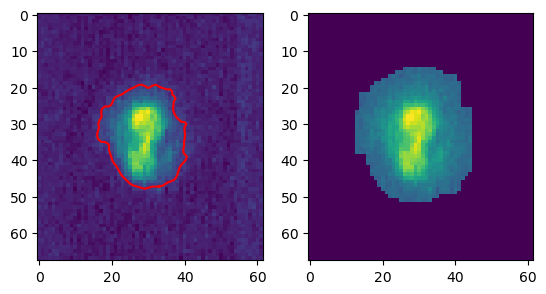

In [1667]:

img = image
contours = measure.find_contours(new_mask, level= 0.2)
f,ax = plt.subplots(ncols = 2)
ax[0].imshow(img)
for contour in contours:
    ax[0].plot(contour[:,1],contour[:,0],'r')
selected_image = image*(new_mask>0)
ax[1].imshow(selected_image)
plt.show()

In [1668]:
### Uncheck when saving random file
user_input = input(f"Do you want to continue saving {image_file_path}? (yes/no): ")
if user_input.lower() == "yes":
    print("Continuing...")
    #imageio.imwrite(f"/Users/fm07-admin/Gary and Nik Dropbox/@Work at Frankfurt/Segmented_images_CellPose_Cyto3_15/Tiff_images/{image_file_path}", selected_image.astype("uint16"), format = "TIFF")
    img = image
    contours = measure.find_contours(new_mask, level= 0.2)
    f,ax = plt.subplots(ncols = 2)
    ax[0].imshow(img)
    for contour in contours:
        ax[0].plot(contour[:,1],contour[:,0],'r')
    selected_image = image*new_mask
    ax[1].imshow(selected_image)
    imageio.imwrite(f"/Users/fm07-admin/Gary and Nik Dropbox/@Work at Frankfurt/Segmented_images_CellPose_Cyto3_15/Tiff_images/{image_file_path}", selected_image.astype("uint16"), format = "TIFF")
    f.savefig(os.path.join(f"/Users/fm07-admin/Gary and Nik Dropbox/@Work at Frankfurt/Segmented_images_CellPose_Cyto3_15/Png_images/{image_file_path.replace('.tif', '.png')}"))
    plt.close()
else:
    print("Exiting...")

Do you want to continue saving Human JAK2+ patient samples/JAK2-GZ02_1_R4&R3&R2&R1/1688_Ch5.ome.tif? (yes/no): yes
Continuing...
